<a href="https://colab.research.google.com/github/arima1998/Thesiskz/blob/main/THESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
import xgboost as xgb

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Thesis/new.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Age                       419 non-null    int64         
 1   Gender                    419 non-null    object        
 2   Occupation                419 non-null    object        
 3   Address                   419 non-null    object        
 4   Policy Age (Years)        419 non-null    int64         
 5   Coverage type             419 non-null    object        
 6   Coverage Amount           419 non-null    int64         
 7   Previous Claims           419 non-null    int64         
 8   Claim Frequency           419 non-null    float64       
 9   Claim Date                419 non-null    datetime64[ns]
 10  Incedent Date             419 non-null    datetime64[ns]
 11  Claim Type                419 non-null    object        
 12  Claim Amount          

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df['Claim Date'] = pd.to_datetime(df['Claim Date'], format='%d/%m/%Y')
df['Incedent Date'] = pd.to_datetime(df['Incedent Date'], format='%d/%m/%Y')

In [ ]:
df['Days Between'] = (df['Claim Date'] - df['Incedent Date']).dt.days

In [ ]:
df = df.drop(columns=['Claim Date', 'Incedent Date'])

In [ ]:
df['Claim Amount'] = df['Claim Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Coverage Amount']=df['Coverage Amount'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.head(2)

,Age,Gender,Occupation,Address,Policy Age (Years),Coverage type,Coverage Amount,Previous Claims,Claim Frequency,Claim Date,...,Geographic Location,Suspicious Circumstances,Financial Difficulties,Exaggerated Damages,Discrepancies,Delayed Reporting,Witness Statements,Surveillance Evidence,Fraud or Not,Days Between
0,45,M,Teacher,Dhaka,10,"Fire, Theft",20000.0,2,0.2,2024-05-01,...,Low-risk,No,No,No,No,No,Yes,Yes,Non-Fraud,2
1,38,F,Engineer,Chattogram,5,Theft,15000.0,0,0.0,2024-04-25,...,High-risk,Yes,Yes,Yes,Yes,Yes,No,No,Fraud,3


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

In [ ]:
df.head(3)

,Age,Gender,Occupation,Address,Policy Age (Years),Coverage type,Coverage Amount,Previous Claims,Claim Frequency,Claim Type,...,Geographic Location,Suspicious Circumstances,Financial Difficulties,Exaggerated Damages,Discrepancies,Delayed Reporting,Witness Statements,Surveillance Evidence,Fraud or Not,Days Between
0,45,M,Teacher,Dhaka,10,"Fire, Theft",20000.0,2,0.200,Fire,...,Low-risk,No,No,No,No,No,Yes,Yes,Non-Fraud,2
1,38,F,Engineer,Chattogram,5,Theft,15000.0,0,0.000,Theft,...,High-risk,Yes,Yes,Yes,Yes,Yes,No,No,Fraud,3
2,50,M,Businessman,Sylhet,8,Water Damage,10000.0,1,0.125,Water,...,Moderate-risk,No,No,No,No,No,Yes,Yes,Non-Fraud,2


In [ ]:
label_encoder = LabelEncoder()
binary_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head(3)

,Age,Gender,Occupation,Address,Policy Age (Years),Coverage type,Coverage Amount,Previous Claims,Claim Frequency,Claim Type,...,Geographic Location,Suspicious Circumstances,Financial Difficulties,Exaggerated Damages,Discrepancies,Delayed Reporting,Witness Statements,Surveillance Evidence,Fraud or Not,Days Between
0,45,1,Teacher,Dhaka,10,"Fire, Theft",20000.0,2,0.200,Fire,...,Low-risk,0,0,0,0,0,1,1,1,2
1,38,0,Engineer,Chattogram,5,Theft,15000.0,0,0.000,Theft,...,High-risk,1,1,1,1,1,0,0,0,3
2,50,1,Businessman,Sylhet,8,Water Damage,10000.0,1,0.125,Water,...,Moderate-risk,0,0,0,0,0,1,1,1,2


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head(2)

,Age,Gender,Policy Age (Years),Coverage Amount,Previous Claims,Claim Frequency,Claim Amount,Claim Severity,Suspicious Circumstances,Financial Difficulties,...,Claim Type_Fire,Claim Type_Riot,Claim Type_Storm,Claim Type_Theft,Claim Type_Water,Geographic Location_High-risk area,Geographic Location_Low-risk,Geographic Location_Low-risk area,Geographic Location_Moderate-risk,Geographic Location_Moderate-risk area
0,45,1,10,20000.0,2,0.2,15000.0,0,0,0,...,True,False,False,False,False,False,True,False,False,False
1,38,0,5,15000.0,0,0.0,10000.0,1,1,1,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop(columns=['Fraud or Not'])
y = df['Fraud or Not']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(y_resampled.value_counts())

Fraud or Not
1    312
0    312
Name: count, dtype: int64


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [ ]:
feature_importance_df

,Feature,Importance
9,Financial Difficulties,1.386739e-01
10,Exaggerated Damages,1.294271e-01
8,Suspicious Circumstances,1.213506e-01
11,Discrepancies,6.024713e-02
5,Claim Frequency,5.724349e-02
...,...,...
40,Address_Cumilla,1.117039e-05
39,Address_Comilla,7.976625e-07
33,Occupation_Scientist,0.000000e+00
43,Address_Narayanganj,0.000000e+00


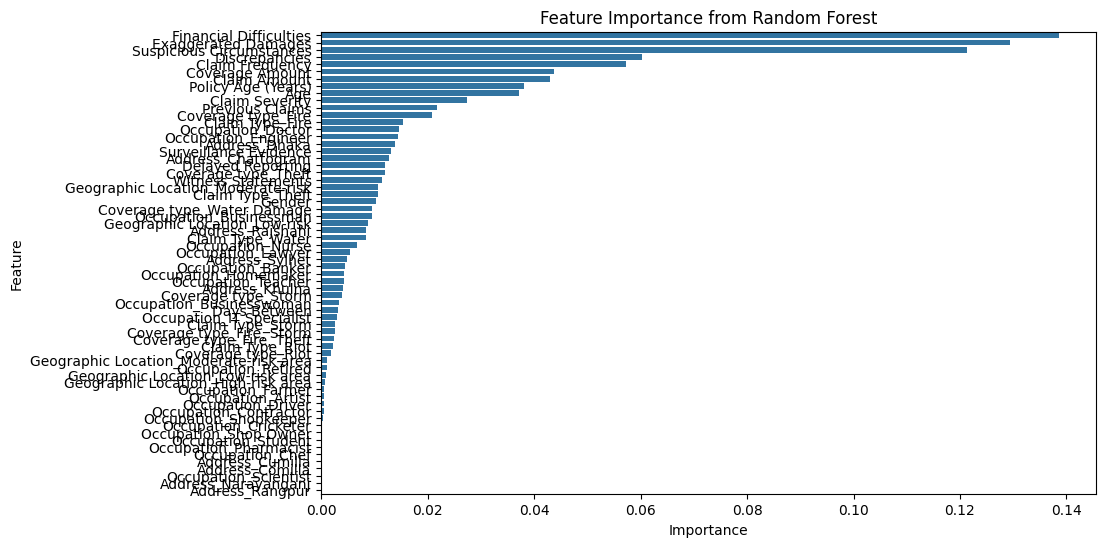

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

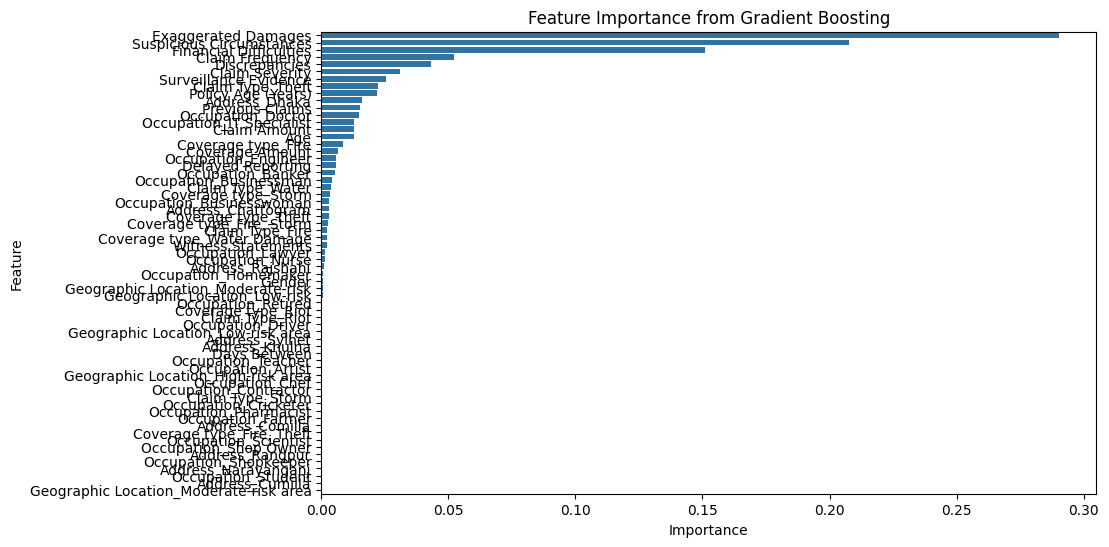

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

In [ ]:
n = 10
top_features = feature_importance_df['Feature'].head(n)
print("Top features by importance:", top_features)

Top features by importance: 10         Exaggerated Damages
8     Suspicious Circumstances
9       Financial Difficulties
5              Claim Frequency
11               Discrepancies
7               Claim Severity
14       Surveillance Evidence
57            Claim Type_Theft
2           Policy Age (Years)
41               Address_Dhaka
Name: Feature, dtype: object


In [ ]:
X_selected = X_resampled[top_features]
X_selected

,Exaggerated Damages,Suspicious Circumstances,Financial Difficulties,Claim Frequency,Discrepancies,Claim Severity,Surveillance Evidence,Claim Type_Theft,Policy Age (Years),Address_Dhaka
0,0,0,0,0.200000,0,0,1,False,10,True
1,1,1,1,0.000000,1,1,0,True,5,False
2,0,0,0,0.125000,0,1,1,False,8,False
3,1,0,1,0.250000,1,0,0,False,12,False
4,1,1,1,0.000000,1,1,0,False,2,True
...,...,...,...,...,...,...,...,...,...,...
619,1,1,0,0.151906,1,0,1,True,19,False
620,1,1,0,0.207216,0,1,1,False,5,True
621,0,0,1,0.191618,0,0,1,False,10,True
622,1,1,1,0.437930,1,0,0,False,6,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.94


In [ ]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[52  3]
 [ 4 66]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.96      0.94      0.95        70

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [ ]:
bagging = BaggingClassifier(base_estimator=best_rf, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` 

In [ ]:
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}")

Bagging Accuracy: 0.94


In [ ]:
print("Bagging Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

Bagging Confusion Matrix:
[[52  3]
 [ 4 66]]


In [ ]:
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.96      0.94      0.95        70

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [ ]:
xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

In [ ]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgboost):.2f}")
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

XGBoost Accuracy: 0.94
XGBoost Confusion Matrix:
[[54  1]
 [ 7 63]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.98      0.90      0.94        70

    accuracy                           0.94       125
   macro avg       0.93      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [ ]:
gboost = GradientBoostingClassifier(random_state=42)
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gboost):.2f}")
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gboost))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gboost))


Gradient Boosting Accuracy: 0.92
Gradient Boosting Confusion Matrix:
[[51  4]
 [ 6 64]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.94      0.91      0.93        70

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logistic_pred):.2f}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Accuracy: 0.89
Logistic Regression Confusion Matrix:
[[52  3]
 [11 59]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        55
           1       0.95      0.84      0.89        70

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.90      0.89      0.89       125



In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'Support Vector Machine Accuracy: {svm_accuracy}')
print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Accuracy: 0.944
Support Vector Machine Confusion Matrix:
[[51  4]
 [ 3 67]]
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.94      0.96      0.95        70

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [ ]:
estimators = [
    ('rf', best_rf),
    ('gboost', gboost),
    ('xgboost', xgboost),
    ('logistic', logistic),
    ('svm',svm)
]

In [ ]:
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42), cv=5)

In [ ]:
param_grid_stacking = {
    'final_estimator__n_estimators': [100, 200, 300],
    'final_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'final_estimator__max_depth': [4, 6, 8, 10, 12],
    'final_estimator__criterion': ['gini', 'entropy']
}

In [ ]:
grid_search_stacking = GridSearchCV(estimator=stacking, param_grid=param_grid_stacking, cv=5, n_jobs=-1, verbose=2)
grid_search_stacking.fit(X_train, y_train)
best_stacking = grid_search_stacking.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
print("Best parameters for Stacking:", grid_search_stacking.best_params_)

Best parameters for Stacking: {'final_estimator__criterion': 'entropy', 'final_estimator__max_depth': 4, 'final_estimator__max_features': 'auto', 'final_estimator__n_estimators': 100}


In [ ]:
y_pred_stacking = best_stacking.predict(X_test)
print(f"Stacking Accuracy: {accuracy_score(y_test, y_pred_stacking):.2f}")
print("Stacking Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))


Stacking Accuracy: 0.94
Stacking Confusion Matrix:
[[53  2]
 [ 5 65]]


In [ ]:
print("Stacking Classification Report:")
print(classification_report(y_test, y_pred_stacking))

Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.97      0.93      0.95        70

    accuracy                           0.94       125
   macro avg       0.94      0.95      0.94       125
weighted avg       0.95      0.94      0.94       125



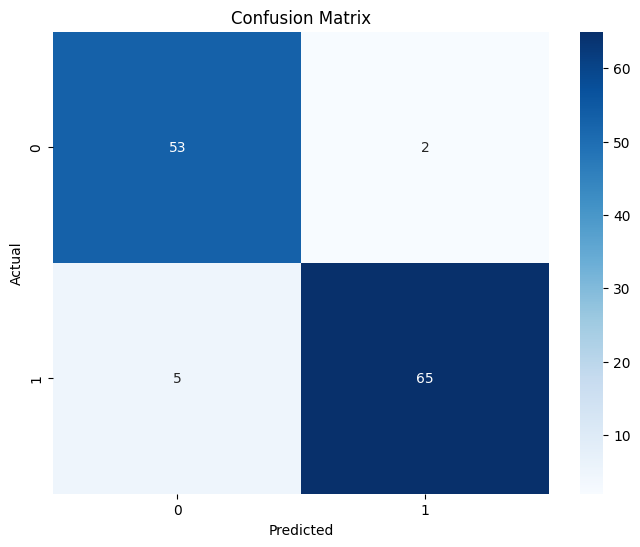

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_stacking), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
models = {
    'Random Forest': best_rf,
    'Bagging': bagging,
    'Gradient Boosting': gboost,
    'XGBoost': xgboost,
    'Stacking': best_stacking,
    'Logistic Regression': logistic,
    'Support Vector Machine': svm
}

In [ ]:
results = {}

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Model")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(results[name]['Confusion Matrix'])
    print("\n")


Random Forest Model
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
Confusion Matrix:
[[52  3]
 [ 4 66]]


Bagging Model
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
Confusion Matrix:
[[52  3]
 [ 4 66]]


Gradient Boosting Model
Accuracy: 0.92
Precision: 0.94
Recall: 0.91
F1 Score: 0.93
Confusion Matrix:
[[51  4]
 [ 6 64]]


XGBoost Model
Accuracy: 0.94
Precision: 0.98
Recall: 0.90
F1 Score: 0.94
Confusion Matrix:
[[54  1]
 [ 7 63]]


Stacking Model
Accuracy: 0.94
Precision: 0.97
Recall: 0.93
F1 Score: 0.95
Confusion Matrix:
[[53  2]
 [ 5 65]]


Logistic Regression Model
Accuracy: 0.89
Precision: 0.95
Recall: 0.84
F1 Score: 0.89
Confusion Matrix:
[[52  3]
 [11 59]]


Support Vector Machine Model
Accuracy: 0.94
Precision: 0.94
Recall: 0.96
F1 Score: 0.95
Confusion Matrix:
[[51  4]
 [ 3 67]]




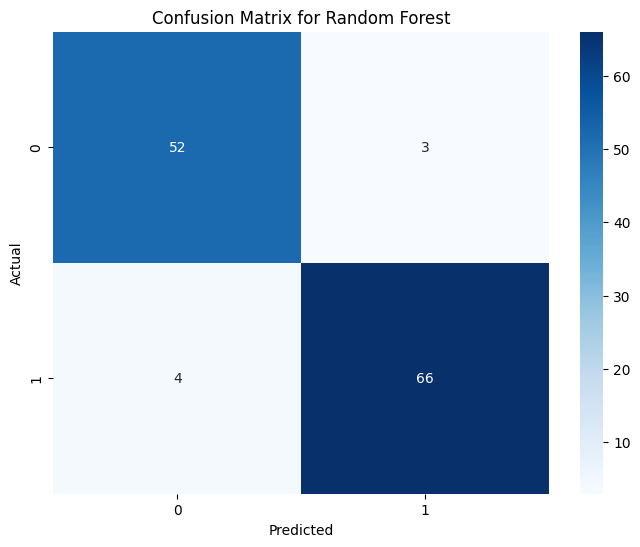

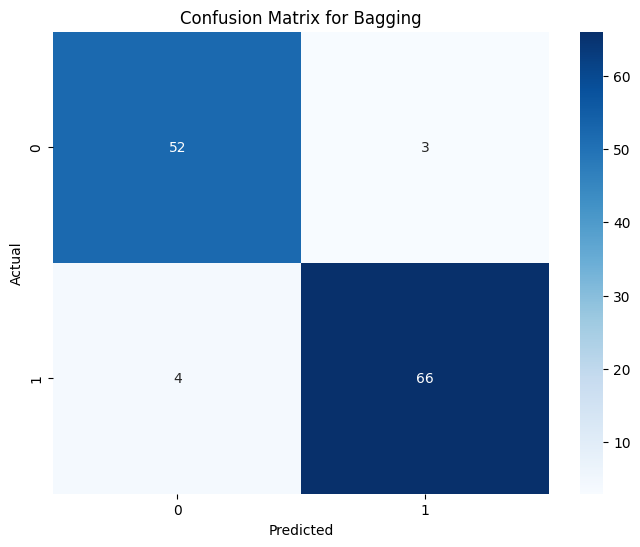

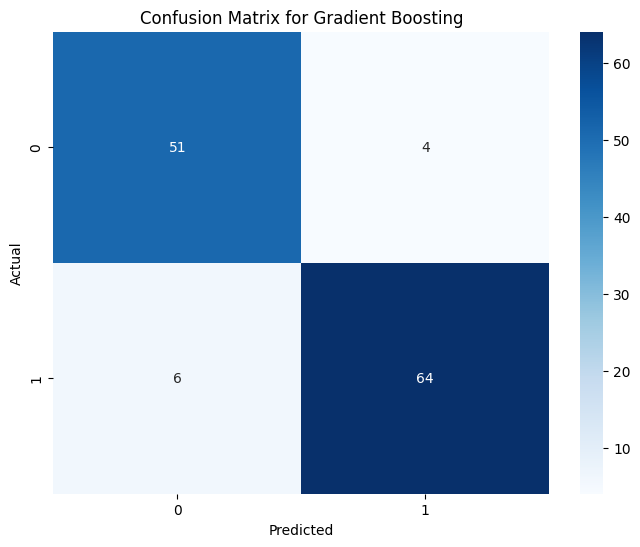

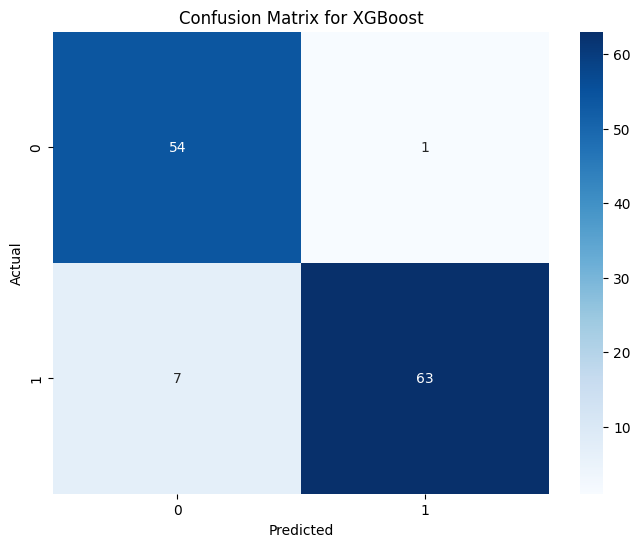

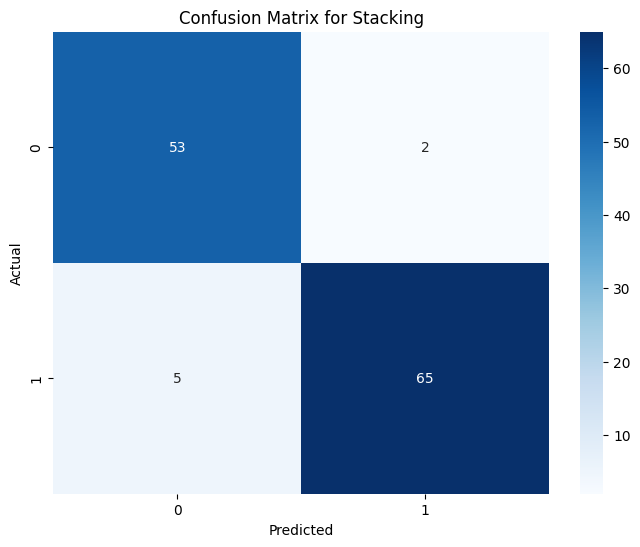

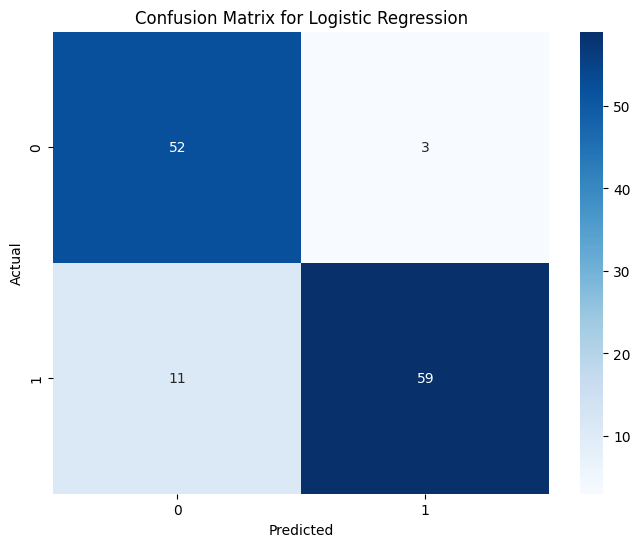

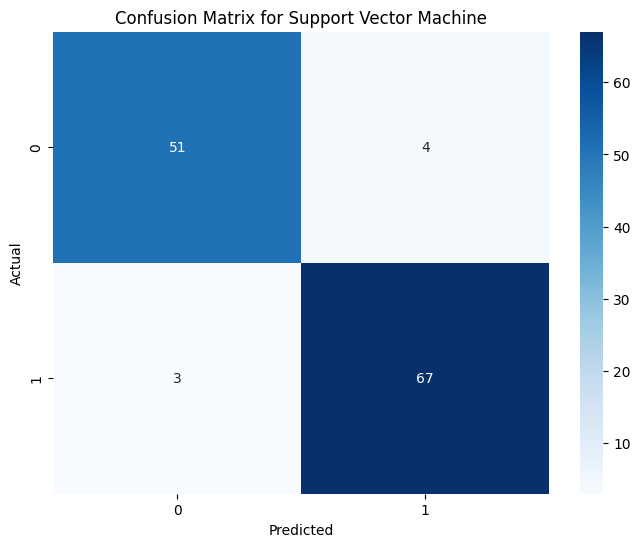

In [ ]:
for name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [ ]:
model_names = list(results.keys())
accuracy_scores = [results[name]['Accuracy'] for name in model_names]
f1_scores = [results[name]['F1 Score'] for name in model_names]

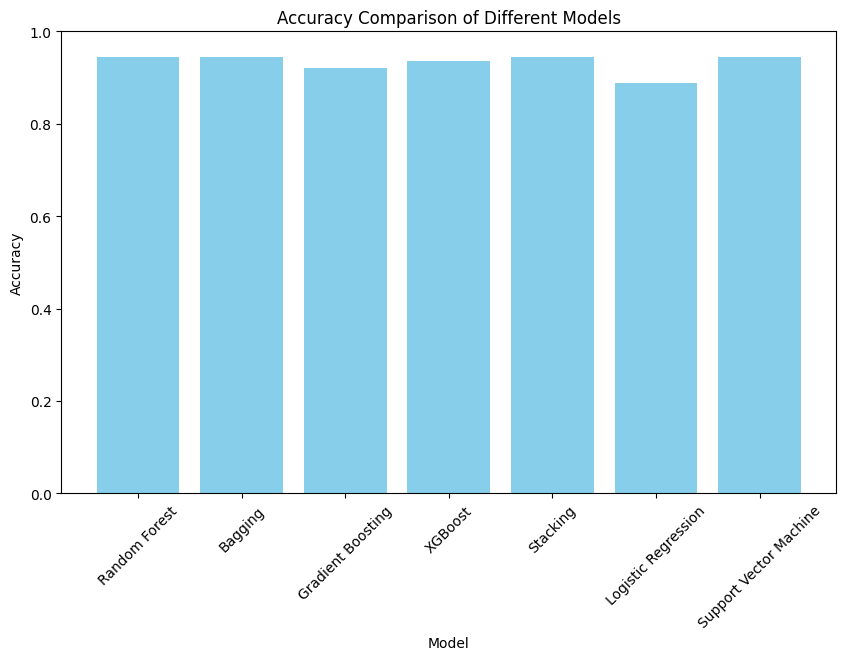

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
